In [ ]:
#Importing necessary packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter

In [ ]:
#Loading the entire dataset as a dataframe into the variable df_full
df_full = pd.read_csv('/content/DataCoSupplyChainDataset (1).csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)


#**Data Cleaning & Exploring Basic Info of Data**


In [ ]:
df_full.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df_full.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.0,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,291,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,26024,1004,8.0,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,2813,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2813,1/15/2016 20:18,26022,1004,12.0,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Andrea,7547,Ortega,XXXXXXXXX,Consumer,PR,697 Little Meadow,725.0,7,Fan Shop,18.290380,-66.370613,Pacific Asia,Nagercoil,India,7547,1/15/2016 18:54,26018,1004,16.0,0.04,65113,399.980011,0.44,1,399.980011,383.980011,168.949997,South Asia,Tamil Nadu,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

###Missing values estimation


In [ ]:
def features_with_missing_values(data):
    total_missing = data.isnull().sum().sum()
    total_cells = data.size
    percentage_missing = (total_missing / total_cells) * 100

    print(f'Percentage of Total Missing Values: {percentage_missing:.2f}%')
    print('Missing Value Estimation:')

    for column in data.columns:
        missing_count = data[column].isna().sum()
        if missing_count > 0:
            print(f'The Feature {column} has {missing_count} missing values')


features_with_missing_values(df_full)

Percentage of Total Missing Values: 3.51%
Missing Value Estimation:
The Feature Customer Lname has 8 missing values
The Feature Customer Zipcode has 3 missing values
The Feature Order Zipcode has 155679 missing values
The Feature Product Description has 180519 missing values


###Heatmap to find out which features are correlated


<ipython-input-9-15fb52f83194>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmap = df_full.corr()


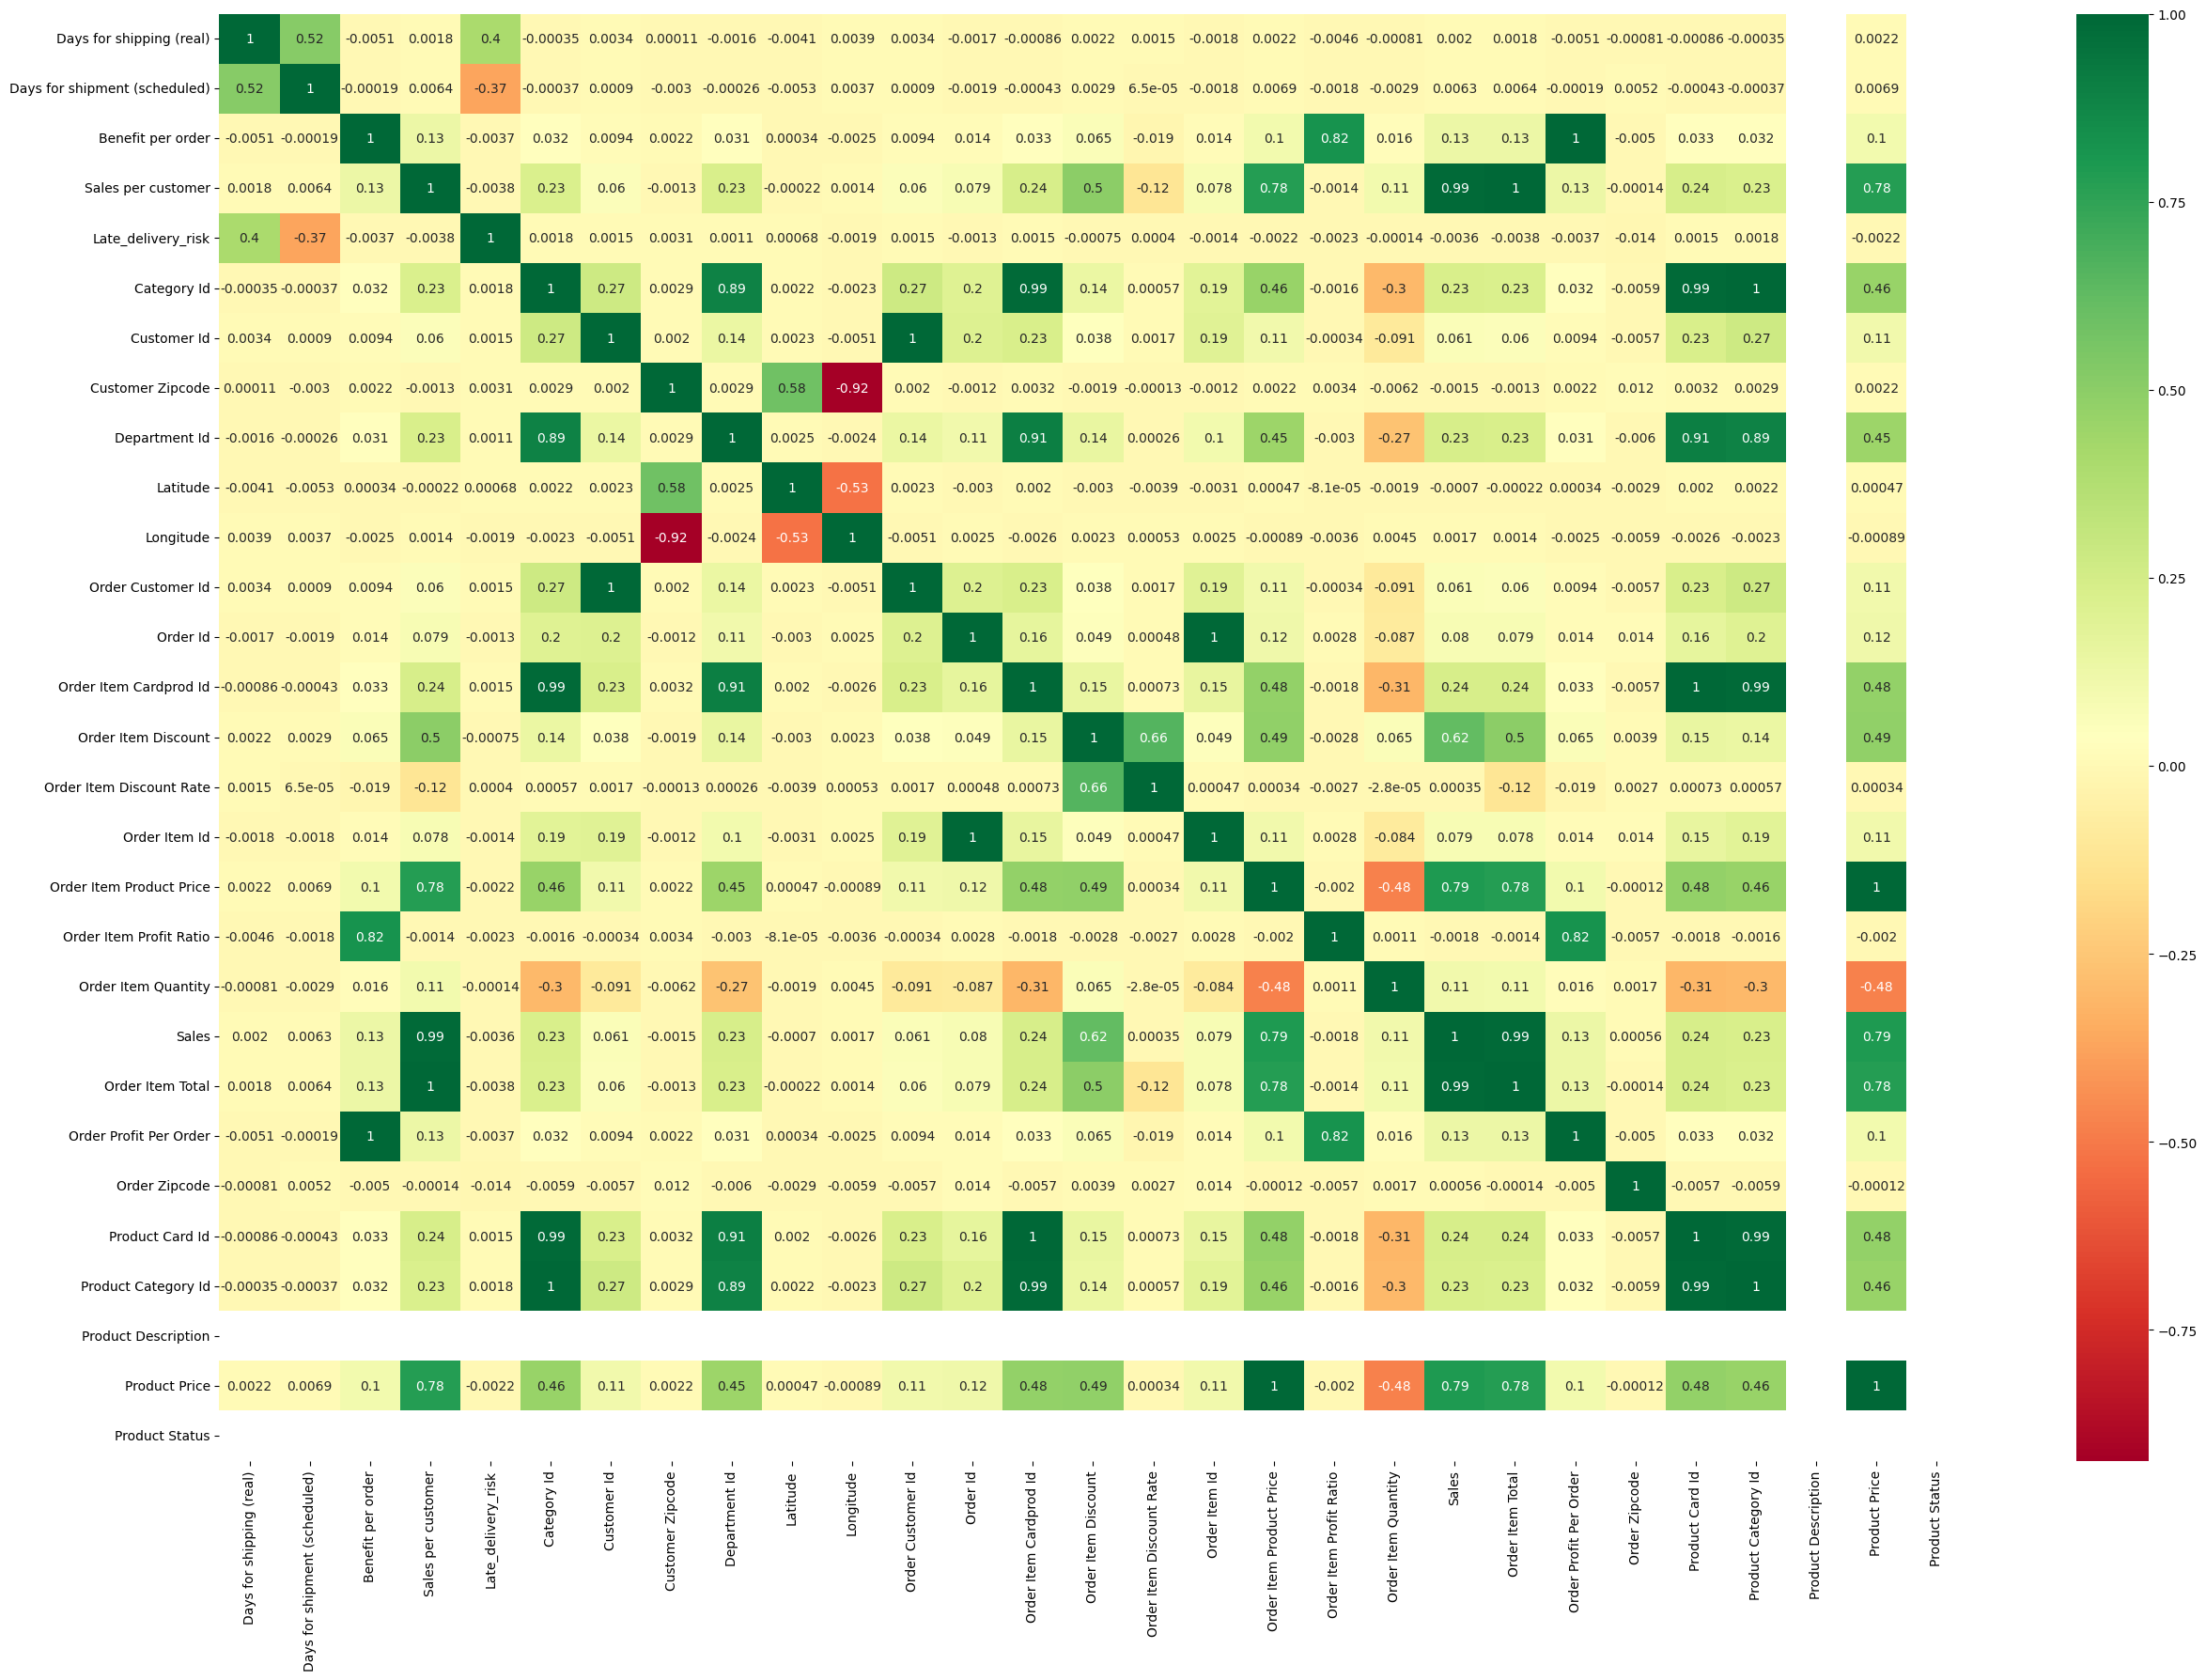

In [ ]:
corrmap = df_full.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df_full[top].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Similar columns from the above heatmap
"""[Benefit per order], Order Profit per order similar
[Sales per customer], Sales, Order Item Total similar
[Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID similar
[Order Item Product Price],Product Price similar"""


'[Benefit per order], Order Profit per order similar\n[Sales per customer], Sales, Order Item Total similar\n[Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID similar\n[Order Item Product Price],Product Price similar'

### Creating a smaller dataframe having the columns of interest and removing the redundant ones


In [ ]:
selected_columns = ['Type', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk','Delivery Status',
                     'Category Name', 'Customer Id', 'Customer Country', 'Customer Segment', 'Customer State',
                     'Department Name', 'Market', 'Order Country', 'Order City', 'Order Id','Order Item Discount Rate',
                     'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity',
                     'Sales', 'Order Item Total', 'Order Region', 'Order Status', 'Product Name',
                     'Shipping Mode']

# new dataframe df with selected columns
df = df_full[selected_columns]

print(df.head())

       Type  Benefit per order  Sales per customer  Late_delivery_risk  \
0     DEBIT          91.250000          314.640015                   0   
1  TRANSFER        -249.089996          311.359985                   1   
2      CASH        -247.779999          309.720001                   0   
3     DEBIT          22.860001          304.809998                   0   
4   PAYMENT         134.210007          298.250000                   0   

    Delivery Status   Category Name  Customer Id Customer Country  \
0  Advance shipping  Sporting Goods        20755      Puerto Rico   
1     Late delivery  Sporting Goods        19492      Puerto Rico   
2  Shipping on time  Sporting Goods        19491          EE. UU.   
3  Advance shipping  Sporting Goods        19490          EE. UU.   
4  Advance shipping  Sporting Goods        19489      Puerto Rico   

  Customer Segment Customer State Department Name        Market Order Country  \
0         Consumer             PR         Fitness  Pacific 

###Brief information about the new dataframe


In [ ]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))
data_info(df)

1) Number of columns are :  25
2) Number of rows are :  180519
3) Total number of data-points : 4512975
4) Count of Numerical Features : 11
5) Count of Categorical Features : 14


###Missing values estimation in new dataframe


In [ ]:
def features_with_missing_values(data):
    total_missing = data.isnull().sum().sum()
    total_cells = data.size
    percentage_missing = (total_missing / total_cells) * 100

    print(f'Percentage of Total Missing Values: {percentage_missing:.2f}%')
    print('Missing Value Estimation:')

    for column in data.columns:
        missing_count = data[column].isna().sum()
        if missing_count > 0:
            print(f'The Feature {column} has {missing_count} missing values')


features_with_missing_values(df)

Percentage of Total Missing Values: 0.00%
Missing Value Estimation:


###Changing the names of the countries from spanish to english


In [ ]:
translation_dict = {
    'Indonesia': 'Indonesia',
    'India': 'India',
    'Australia': 'Australia',
    'China': 'China',
    'Japón': 'Japan',
    'Corea del Sur': 'South Korea',
    'Singapur': 'Singapore',
    'Turquía': 'Turkey',
    'Mongolia': 'Mongolia',
    'Estados Unidos': 'United States',
    'Nigeria': 'Nigeria',
    'República Democrática del Congo': 'Democratic Republic of the Congo',
    'Senegal': 'Senegal',
    'Marruecos': 'Morocco',
    'Alemania': 'Germany',
    'Francia': 'France',
    'Países Bajos': 'Netherlands',
    'Reino Unido': 'United Kingdom',
    'Guatemala': 'Guatemala',
    'El Salvador': 'El Salvador',
    'Panamá': 'Panama',
    'República Dominicana': 'Dominican Republic',
    'Venezuela': 'Venezuela',
    'Colombia': 'Colombia',
    'Honduras': 'Honduras',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Uruguay': 'Uruguay',
    'Argentina': 'Argentina',
    'Cuba': 'Cuba',
    'Perú': 'Peru',
    'Nicaragua': 'Nicaragua',
    'Ecuador': 'Ecuador',
    'Angola': 'Angola',
    'Sudán': 'Sudan',
    'Somalia': 'Somalia',
    'Costa de Marfil': 'Ivory Coast',
    'Egipto': 'Egypt',
    'Italia': 'Italy',
    'España': 'Spain',
    'Suecia': 'Sweden',
    'Austria': 'Austria',
    'Canada': 'Canada',
    'Madagascar': 'Madagascar',
    'Argelia': 'Algeria',
    'Liberia': 'Liberia',
    'Zambia': 'Zambia',
    'Níger': 'Niger',
    'SudAfrica': 'South Africa',
    'Mozambique': 'Mozambique',
    'Tanzania': 'Tanzania',
    'Ruanda': 'Rwanda',
    'Israel': 'Israel',
    'Nueva Zelanda': 'New Zealand',
    'Bangladés': 'Bangladesh',
    'Tailandia': 'Thailand',
    'Irak': 'Iraq',
    'Arabia Saudí': 'Saudi Arabia',
    'Filipinas': 'Philippines',
    'Kazajistán': 'Kazakhstan',
    'Irán': 'Iran',
    'Myanmar (Birmania)': 'Myanmar (Burma)',
    'Uzbekistán': 'Uzbekistan',
    'Benín': 'Benin',
    'Camerún': 'Cameroon',
    'Kenia': 'Kenya',
    'Togo': 'Togo',
    'Ucrania': 'Ukraine',
    'Polonia': 'Poland',
    'Portugal': 'Portugal',
    'Rumania': 'Romania',
    'Trinidad y Tobago': 'Trinidad and Tobago',
    'Afganistán': 'Afghanistan',
    'Pakistán': 'Pakistan',
    'Vietnam': 'Vietnam',
    'Malasia': 'Malaysia',
    'Finlandia': 'Finland',
    'Rusia': 'Russia',
    'Irlanda': 'Ireland',
    'Noruega': 'Norway',
    'Eslovaquia': 'Slovakia',
    'Bélgica': 'Belgium',
    'Bolivia': 'Bolivia',
    'Chile': 'Chile',
    'Jamaica': 'Jamaica',
    'Yemen': 'Yemen',
    'Ghana': 'Ghana',
    'Guinea': 'Guinea',
    'Etiopía': 'Ethiopia',
    'Bulgaria': 'Bulgaria',
    'Kirguistán': 'Kyrgyzstan',
    'Georgia': 'Georgia',
    'Nepal': 'Nepal',
    'Emiratos Árabes Unidos': 'United Arab Emirates',
    'Camboya': 'Cambodia',
    'Uganda': 'Uganda',
    'Lesoto': 'Lesotho',
    'Lituania': 'Lithuania',
    'Suiza': 'Switzerland',
    'Hungría': 'Hungary',
    'Dinamarca': 'Denmark',
    'Haití': 'Haiti',
    'Bielorrusia': 'Belarus',
    'Croacia': 'Croatia',
    'Laos': 'Laos',
    'Baréin': 'Bahrain',
    'Macedonia': 'Macedonia',
    'República Checa': 'Czech Republic',
    'Sri Lanka': 'Sri Lanka',
    'Zimbabue': 'Zimbabwe',
    'Eritrea': 'Eritrea',
    'Burkina Faso': 'Burkina Faso',
    'Costa Rica': 'Costa Rica',
    'Libia': 'Libya',
    'Barbados': 'Barbados',
    'Tayikistán': 'Tajikistan',
    'Siria': 'Syria',
    'Guadalupe': 'Guadeloupe',
    'Papúa Nueva Guinea': 'Papua New Guinea',
    'Azerbaiyán': 'Azerbaijan',
    'Turkmenistán': 'Turkmenistan',
    'Paraguay': 'Paraguay',
    'Jordania': 'Jordan',
    'Hong Kong': 'Hong Kong',
    'Martinica': 'Martinique',
    'Moldavia': 'Moldova',
    'Qatar': 'Qatar',
    'Mali': 'Mali',
    'Albania': 'Albania',
    'República del Congo': 'Republic of the Congo',
    'Bosnia y Herzegovina': 'Bosnia and Herzegovina',
    'Omán': 'Oman',
    'Túnez': 'Tunisia',
    'Sierra Leona': 'Sierra Leone',
    'Yibuti': 'Djibouti',
    'Burundi': 'Burundi',
    'Montenegro': 'Montenegro',
    'Gabón': 'Gabon',
    'Sudán del Sur': 'South Sudan',
    'Luxemburgo': 'Luxembourg',
    'Namibia': 'Namibia',
    'Mauritania': 'Mauritania',
    'Grecia': 'Greece',
    'Suazilandia': 'Eswatini',
    'Guyana': 'Guyana',
    'Guayana Francesa': 'French Guiana',
    'República Centroafricana': 'Central African Republic',
    'Taiwán': 'Taiwan',
    'Estonia': 'Estonia',
    'Líbano': 'Lebanon',
    'Chipre': 'Cyprus',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Surinam': 'Suriname',
    'Belice': 'Belize',
    'Eslovenia': 'Slovenia',
    'República de Gambia': 'Republic of the Gambia',
    'Botsuana': 'Botswana',
    'Armenia': 'Armenia',
    'Guinea Ecuatorial': 'Equatorial Guinea',
    'Kuwait': 'Kuwait',
    'Bután': 'Bhutan',
    'Chad': 'Chad',
    'Serbia': 'Serbia',
    'Sáhara Occidental': 'Western Sahara'
}

# Replace the values in the 'Order Country' column
df.loc[:, 'Order Country'] = df['Order Country'].replace(translation_dict)

<ipython-input-14-d76c5ae52c4b>:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Order Country'] = df['Order Country'].replace(translation_dict)


In [ ]:
unique_values = df['Order Country'].unique()
print(unique_values)

['Indonesia' 'India' 'Australia' 'China' 'Japan' 'South Korea' 'Singapore'
 'Turkey' 'Mongolia' 'United States' 'Nigeria'
 'Democratic Republic of the Congo' 'Senegal' 'Morocco' 'Germany' 'France'
 'Netherlands' 'United Kingdom' 'Guatemala' 'El Salvador' 'Panama'
 'Dominican Republic' 'Venezuela' 'Colombia' 'Honduras' 'Brazil' 'Mexico'
 'Uruguay' 'Argentina' 'Cuba' 'Peru' 'Nicaragua' 'Ecuador' 'Angola'
 'Sudan' 'Somalia' 'Ivory Coast' 'Egypt' 'Italy' 'Spain' 'Sweden'
 'Austria' 'Canada' 'Madagascar' 'Algeria' 'Liberia' 'Zambia' 'Niger'
 'South Africa' 'Mozambique' 'Tanzania' 'Rwanda' 'Israel' 'New Zealand'
 'Bangladesh' 'Thailand' 'Iraq' 'Saudi Arabia' 'Philippines' 'Kazakhstan'
 'Iran' 'Myanmar (Burma)' 'Uzbekistan' 'Benin' 'Cameroon' 'Kenya' 'Togo'
 'Ukraine' 'Poland' 'Portugal' 'Romania' 'Trinidad and Tobago'
 'Afghanistan' 'Pakistan' 'Vietnam' 'Malaysia' 'Finland' 'Russia'
 'Ireland' 'Norway' 'Slovakia' 'Belgium' 'Bolivia' 'Chile' 'Jamaica'
 'Yemen' 'Ghana' 'Guinea' 'Ethiopia' 'Bul

#**Exploratory Data Analysis & Visualisation**

###Breakdown of sales by countries

<ipython-input-16-8660daf264aa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales in Millions', y='Order Country', data=df_sales_country.head(10), palette='viridis')


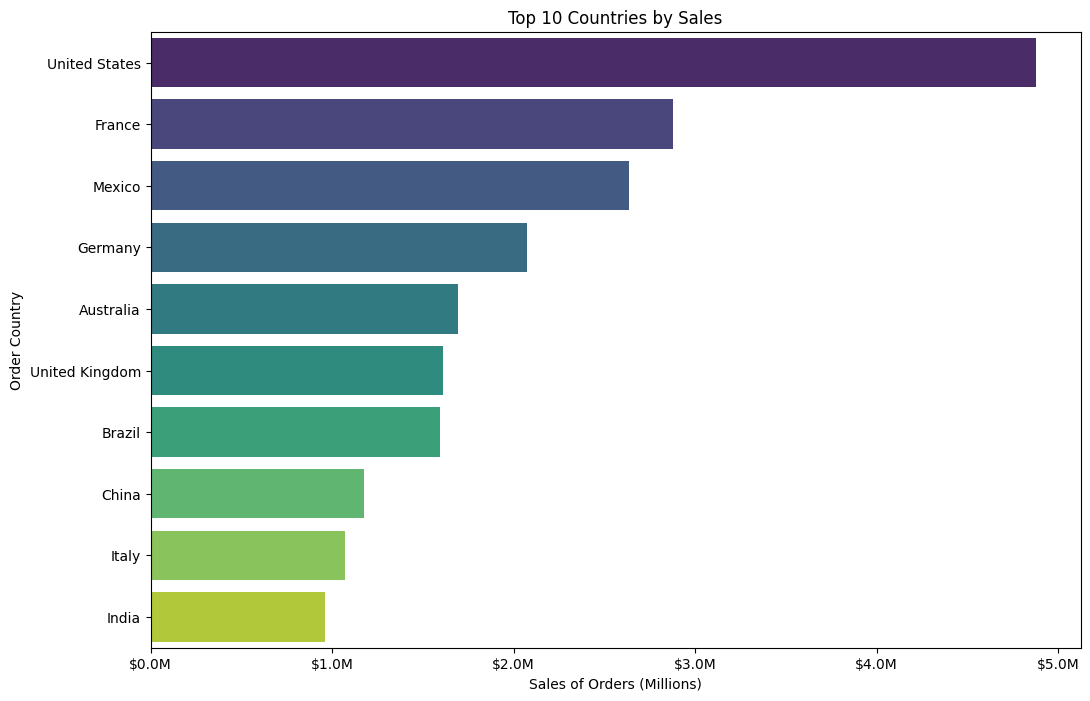

In [ ]:
df_sales_country = df.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)

# Converting sales to millions
df_sales_country['Sales in Millions'] = df_sales_country['Sales of Orders'] / 1_000_000

# Defining a custom function for formatting sales in millions
def format_millions(value, pos):
    return f'${value:.1f}M'

# Creating the bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sales in Millions', y='Order Country', data=df_sales_country.head(10), palette='viridis')

# Formatting the x-axis ticks to display in millions
ax.xaxis.set_major_formatter(FuncFormatter(format_millions))

plt.xlabel('Sales of Orders (Millions)')
plt.ylabel('Order Country')
plt.title('Top 10 Countries by Sales')
plt.show()

###Breakdown of sales by categories


<ipython-input-17-33bfe85e7142>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales in Millions', y='Category Name', data=df_sales_pr.head(10), palette='viridis')


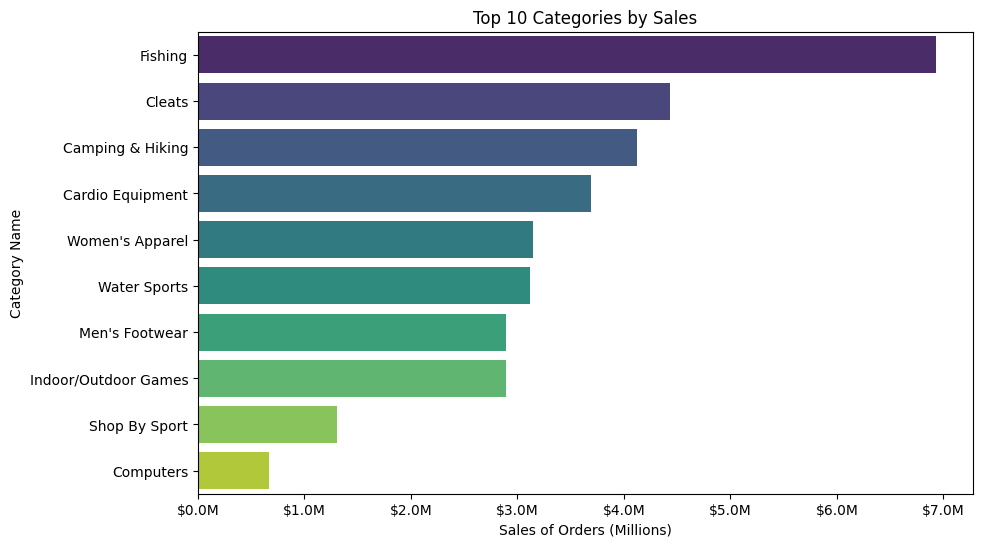

In [ ]:
df_sales_pr = df.groupby(['Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)

# Converting sales to millions
df_sales_pr['Sales in Millions'] = df_sales_pr['Sales of Orders'] / 1_000_000

# Defining a custom function for formatting sales in millions
def format_millions(value, pos):
    return f'${value:.1f}M'

# Creating the bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sales in Millions', y='Category Name', data=df_sales_pr.head(10), palette='viridis')

# Formatting the x-axis ticks to display in millions
ax.xaxis.set_major_formatter(FuncFormatter(format_millions))

plt.xlabel('Sales of Orders (Millions)')
plt.ylabel('Category Name')
plt.title('Top 10 Categories by Sales')
plt.show()

###Breakdown of sales by products


<ipython-input-18-e4b02e970496>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales in Millions', y='Product Name', data=df_sales_product.head(10), palette='viridis')


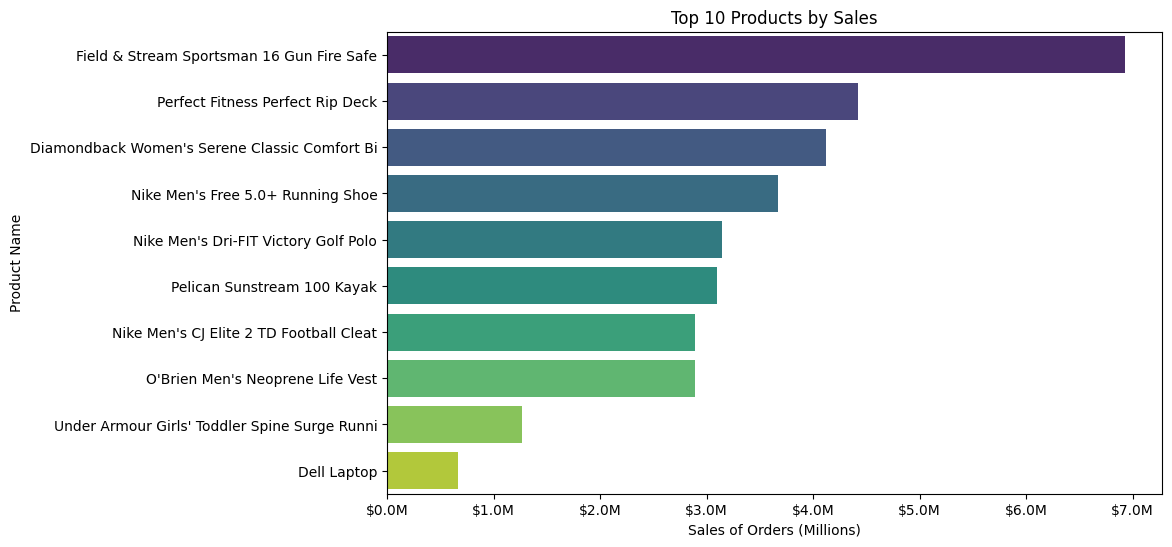

In [ ]:
df_sales_product = df.groupby(['Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by='Sales of Orders', ascending=False)

# Converting sales to millions
df_sales_product['Sales in Millions'] = df_sales_product['Sales of Orders'] / 1_000_000

# Defining a custom function for formatting sales in millions
def format_millions(value, pos):
    return f'${value:.1f}M'

# Creating the bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sales in Millions', y='Product Name', data=df_sales_product.head(10), palette='viridis')

# Formatting the x-axis ticks to display in millions
ax.xaxis.set_major_formatter(FuncFormatter(format_millions))

plt.xlabel('Sales of Orders (Millions)')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Sales')
plt.show()

###Breakdown of number of orders by region


<ipython-input-19-90a5ec3c43c5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Orders', y='Order Region', data=data_region, palette='viridis', order=data_region['Order Region'])


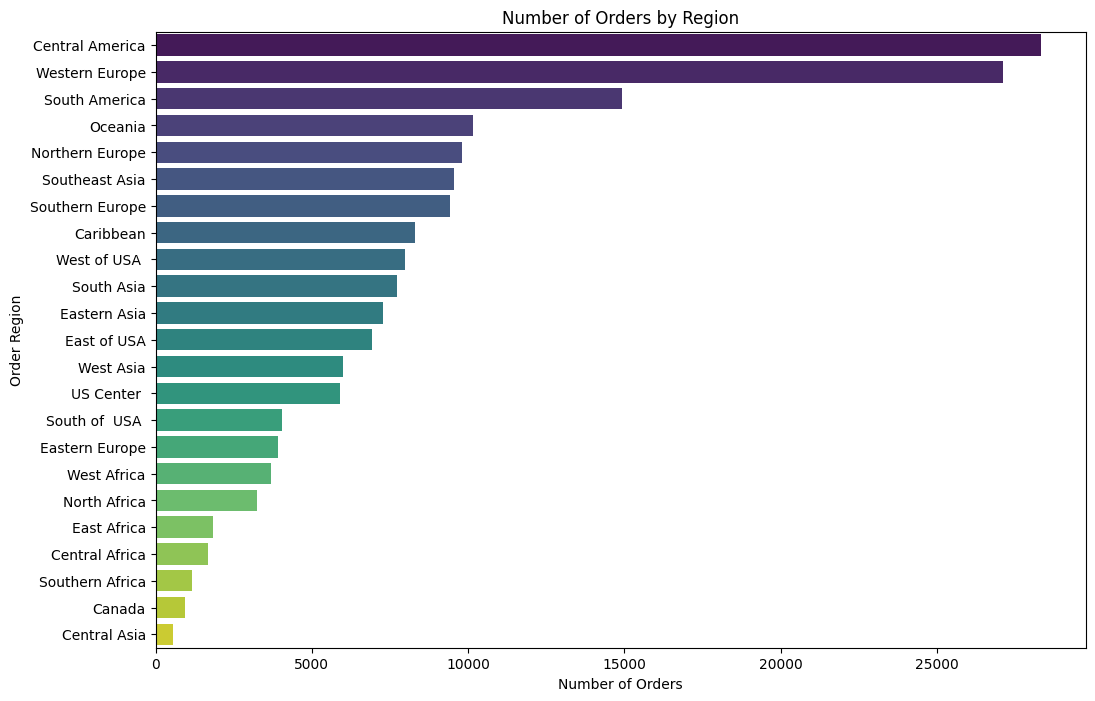

In [ ]:
data_region = df.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=False)

# Creating the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Orders', y='Order Region', data=data_region, palette='viridis', order=data_region['Order Region'])

plt.xlabel('Number of Orders')
plt.ylabel('Order Region')
plt.title('Number of Orders by Region')
plt.show()


###Breakdown of number of orders by category


<ipython-input-20-f7b9888bb7ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Orders', y='Category Name', data=data_Category_Name, palette='viridis_r')  #'viridis_r' for reversed palette


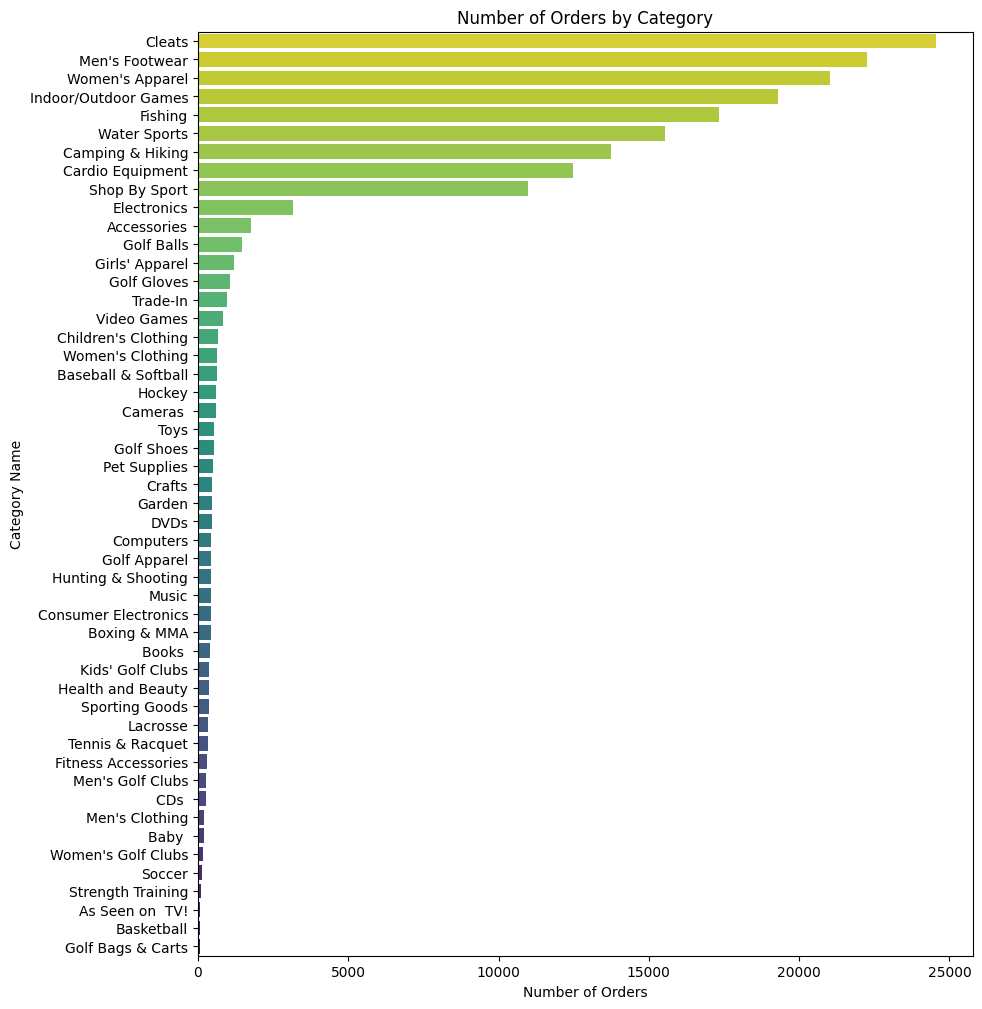

In [ ]:
data_Category_Name = df.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Number of Orders', y='Category Name', data=data_Category_Name, palette='viridis_r')  #'viridis_r' for reversed palette
plt.xlabel('Number of Orders')
plt.ylabel('Category Name')
plt.title('Number of Orders by Category')
plt.show()

###Breakdown of number of orders by region


<ipython-input-21-194d74d0536d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Orders', y='Order Country', data=top_countries, palette='viridis', order=top_countries['Order Country'])


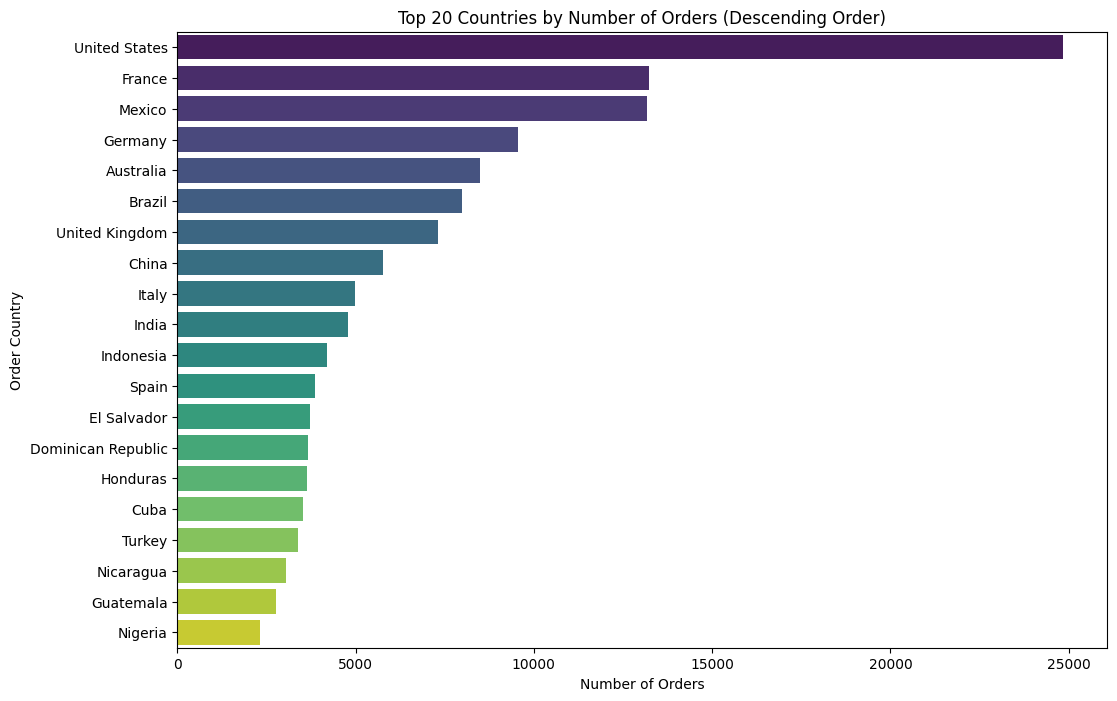

In [ ]:
data_countries = df.groupby(['Order Country'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=False)

# Selecting the top 20 countries
top_countries = data_countries.head(20)

# Creating the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Orders', y='Order Country', data=top_countries, palette='viridis', order=top_countries['Order Country'])

plt.xlabel('Number of Orders')
plt.ylabel('Order Country')
plt.title('Top 20 Countries by Number of Orders (Descending Order)')
plt.show()


###Breakdown of highest selling categories by region


<Figure size 1500x800 with 0 Axes>

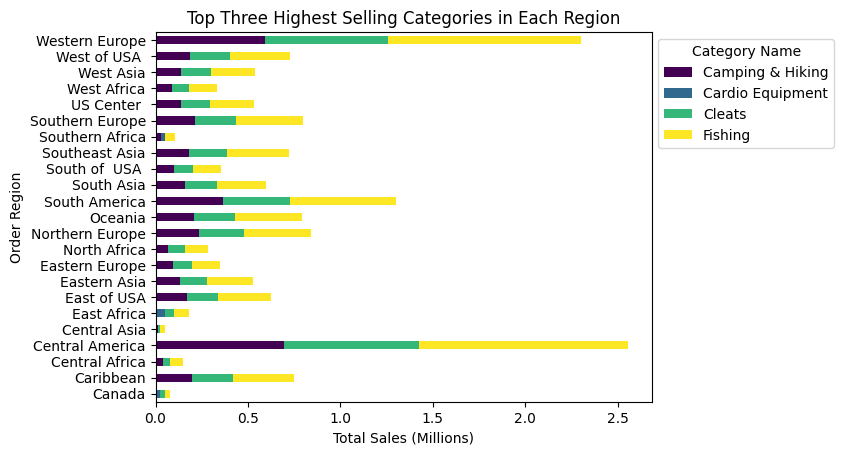

In [ ]:
df_grouped = df.groupby(['Order Region', 'Category Name'])['Sales'].sum().reset_index(name='Total Sales')

# Finding the top three highest selling departments in each region
df_top_three_selling = (
    df_grouped.sort_values(['Order Region', 'Total Sales'], ascending=[True, False])
    .groupby('Order Region')
    .head(3)
)

# Converting 'Total Sales' to millions
df_top_three_selling['Total Sales (Millions)'] = df_top_three_selling['Total Sales'] / 1_000_000

# Pivoting the DataFrame for creating a horizontal stacked bar plot
df_pivot = df_top_three_selling.pivot(index='Order Region', columns='Category Name', values='Total Sales (Millions)').fillna(0)

# Creating a horizontal stacked bar plot using Seaborn
plt.figure(figsize=(15, 8))
df_pivot.plot(kind='barh', stacked=True, colormap='viridis')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Order Region')
plt.title('Top Three Highest Selling Categories in Each Region')
plt.legend(title='Category Name', bbox_to_anchor=(1, 1))
plt.show()

###Transaction type broken down by region (absolute number)


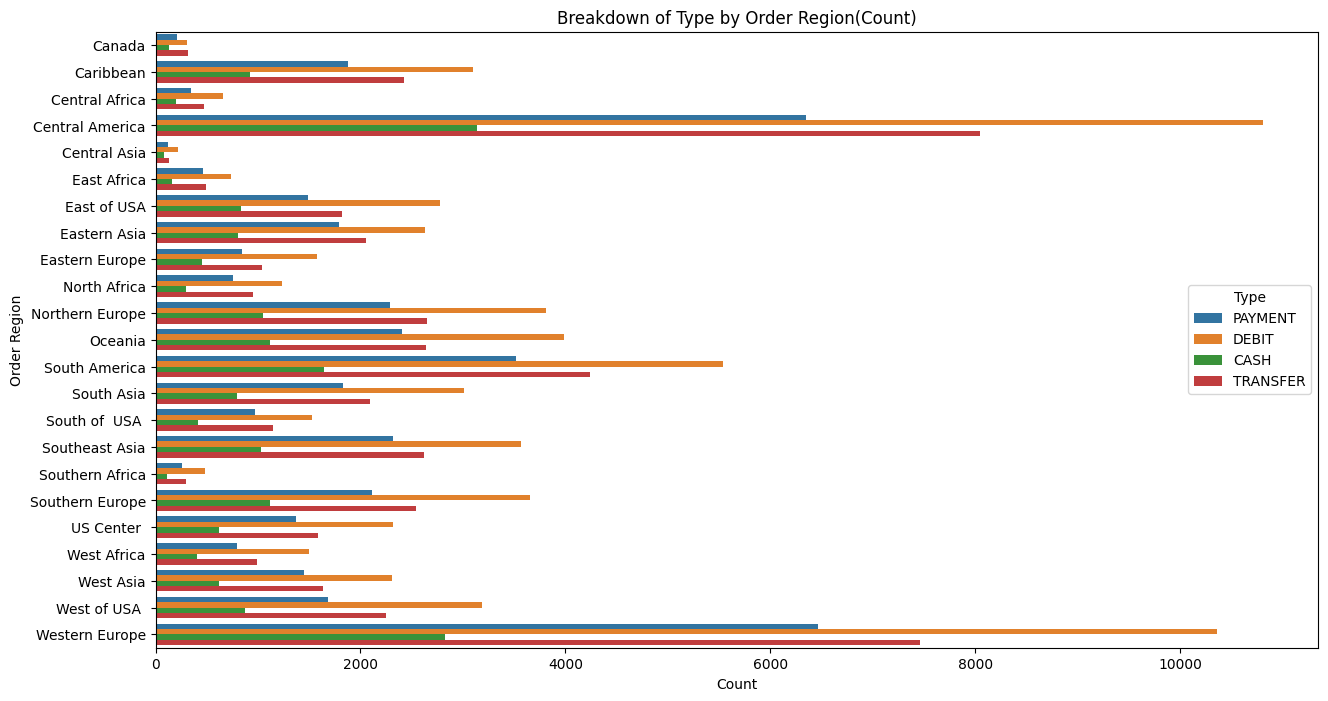

In [ ]:
df_type_counts = df.groupby(['Order Region', 'Type']).size().unstack().reset_index()

# Reordering the columns to match the desired order
desired_order = ['PAYMENT', 'DEBIT', 'CASH', 'TRANSFER']
df_type_counts = df_type_counts[['Order Region'] + desired_order]

# Creating a horizontal stacked bar plot using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=df_type_counts.melt(id_vars='Order Region'), x='value', y='Order Region', hue='Type', orient='h')

plt.xlabel('Count')
plt.ylabel('Order Region')
plt.title('Breakdown of Type by Order Region(Count)')
plt.legend(title='Type')
plt.show()

### Transaction type broken down by region (percentage)


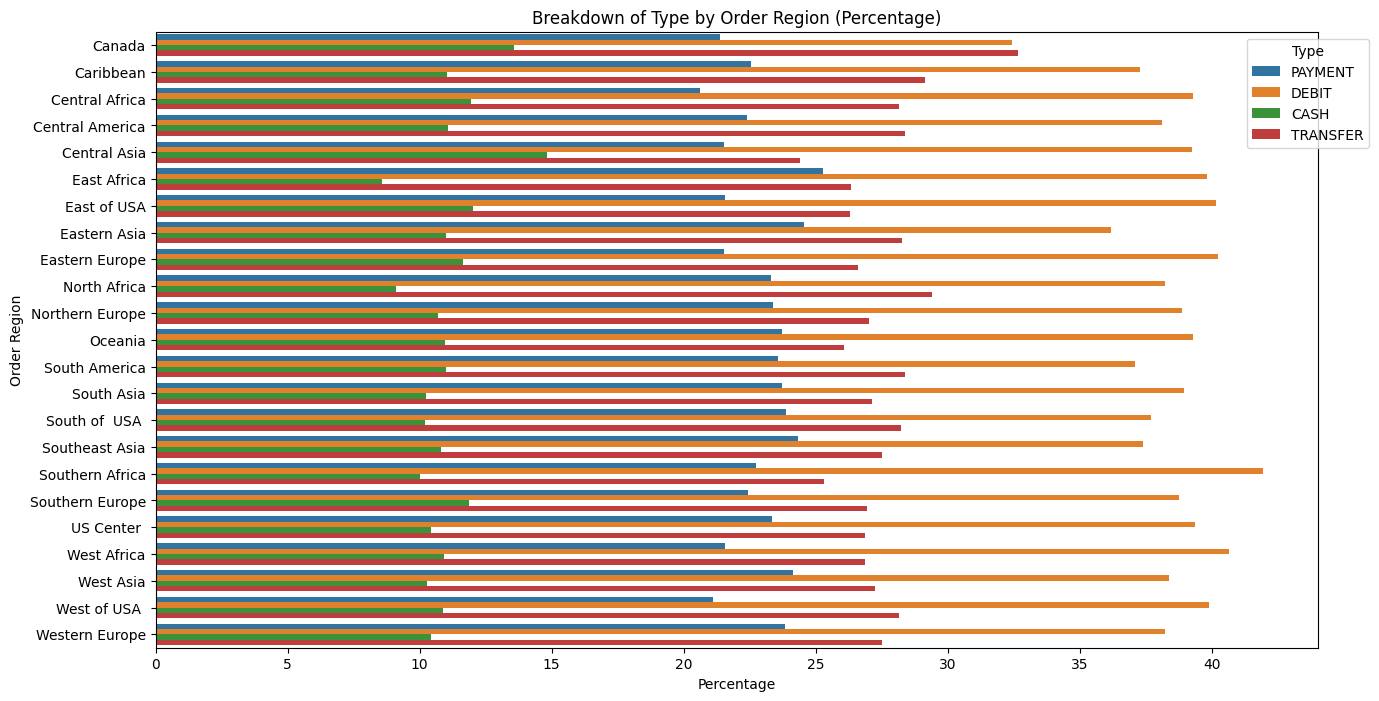

In [ ]:
# Group by order region and type, count the occurrences, and reshape the DataFrame
df_type_counts = df.groupby(['Order Region', 'Type']).size().unstack().reset_index()

# Reordering the columns to match the desired order
desired_order = ['PAYMENT', 'DEBIT', 'CASH', 'TRANSFER']
df_type_counts = df_type_counts[['Order Region'] + desired_order]

# Calculating the percentage of each Type for each Order Region
df_type_percent = df_type_counts.set_index('Order Region').div(df_type_counts.set_index('Order Region').sum(axis=1), axis=0) * 100

# Creating a horizontal 100 percent stacked bar plot using Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_type_percent.stack().reset_index(), x=0, y='Order Region', hue='Type', orient='h')

plt.xlabel('Percentage')
plt.ylabel('Order Region')
plt.title('Breakdown of Type by Order Region (Percentage)')

# Adding a legend with title at the top-right outside the plot area
ax.legend(title='Type', loc='upper right', bbox_to_anchor=(1.05, 1))

plt.show()



###Distribution of Total Profit across countries


In [ ]:
#Creating a new dataframe df_geo for geographical analysis of profit

df_geo = df.groupby(['Order Country', 'Order City'])['Benefit per order'].sum().reset_index(name='Profit of Orders').sort_values(by='Profit of Orders', ascending=False)
df_geo.head()

,Order Country,Order City,Profit of Orders
902,Dominican Republic,Santo Domingo,51111.670019
3393,United States,New York City,47889.759868
1544,Honduras,Tegucigalpa,40973.640056
3331,United States,Los Angeles,38014.360024
2319,Nicaragua,Managua,34319.950107


In [ ]:
# Calculating the sum of profit of orders for each country
df_sum_profit = df_geo.groupby('Order Country')['Profit of Orders'].sum().reset_index(name='Total Profit')

# Creating a new column 'Rank' based on the descending order of 'Total Profit'
df_sum_profit['Rank'] = df_sum_profit['Total Profit'].rank(ascending=False, method='min')

# Sorting the DataFrame based on 'Total Profit' in descending order
df_sum_profit = df_sum_profit.sort_values(by='Total Profit', ascending=False)

# Creating a choropleth map showing the rank and total profit of each country
fig = px.choropleth(df_sum_profit,
                    locationmode='country names',
                    locations='Order Country',
                    color='Rank',
                    hover_name='Order Country',
                    hover_data={'Rank': True, 'Total Profit': ':.2f'},  # Include rank and total profit in hover information
                    color_continuous_scale='Viridis',  # Use a different color scale
                    title='Rank and Total Profit of Orders by Country'
)

fig.show()

###Breakdown of negative profit/loss by products


In [ ]:
#fitering those datapoints with negative values in Benefit per order column, indicating loss
loss = df[df['Benefit per order'] < 0]

<ipython-input-28-fef9ebada7e0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




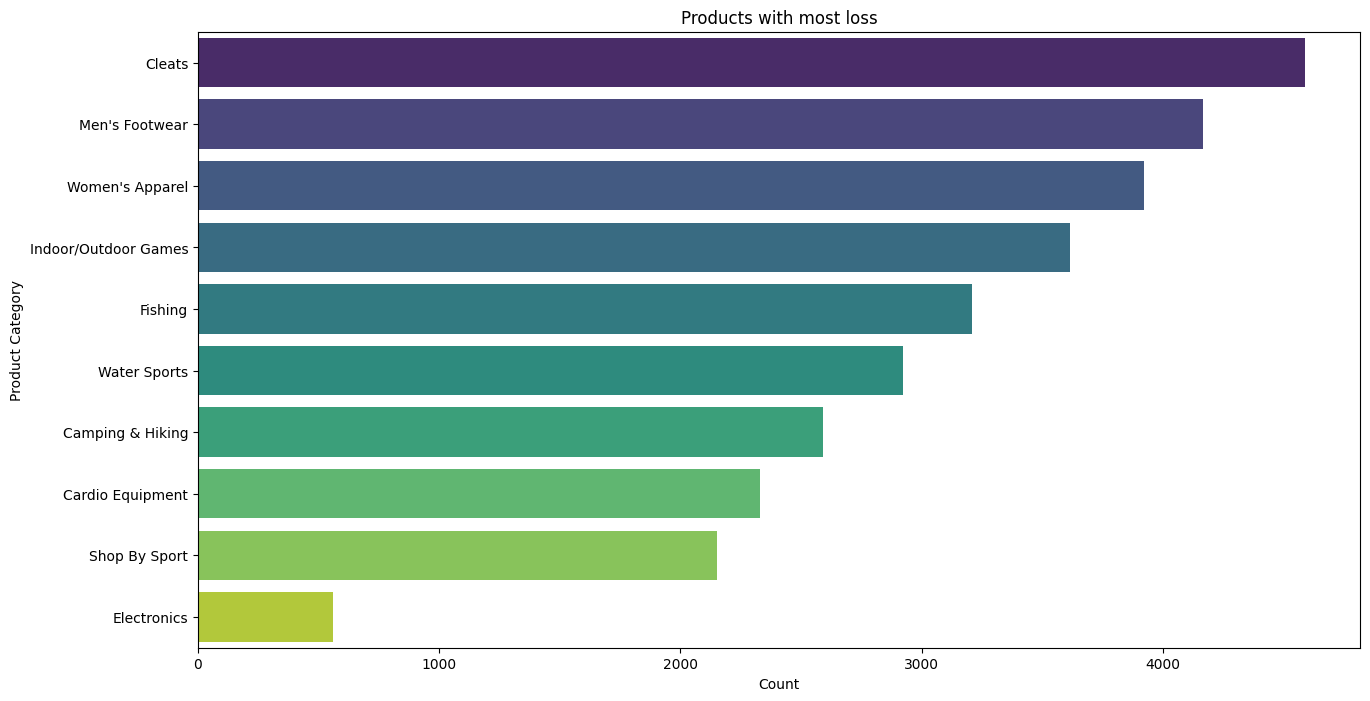

In [ ]:
# Plotting top 10 products with most loss
plt.figure(figsize=(15, 8))
sns.barplot(x=loss['Category Name'].value_counts().nlargest(10), y=loss['Category Name'].value_counts().nlargest(10).index, palette='viridis')
plt.title("Products with most loss")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.show()

###Breakdown of negative profit/loss by region


<ipython-input-29-e759c5d6e214>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




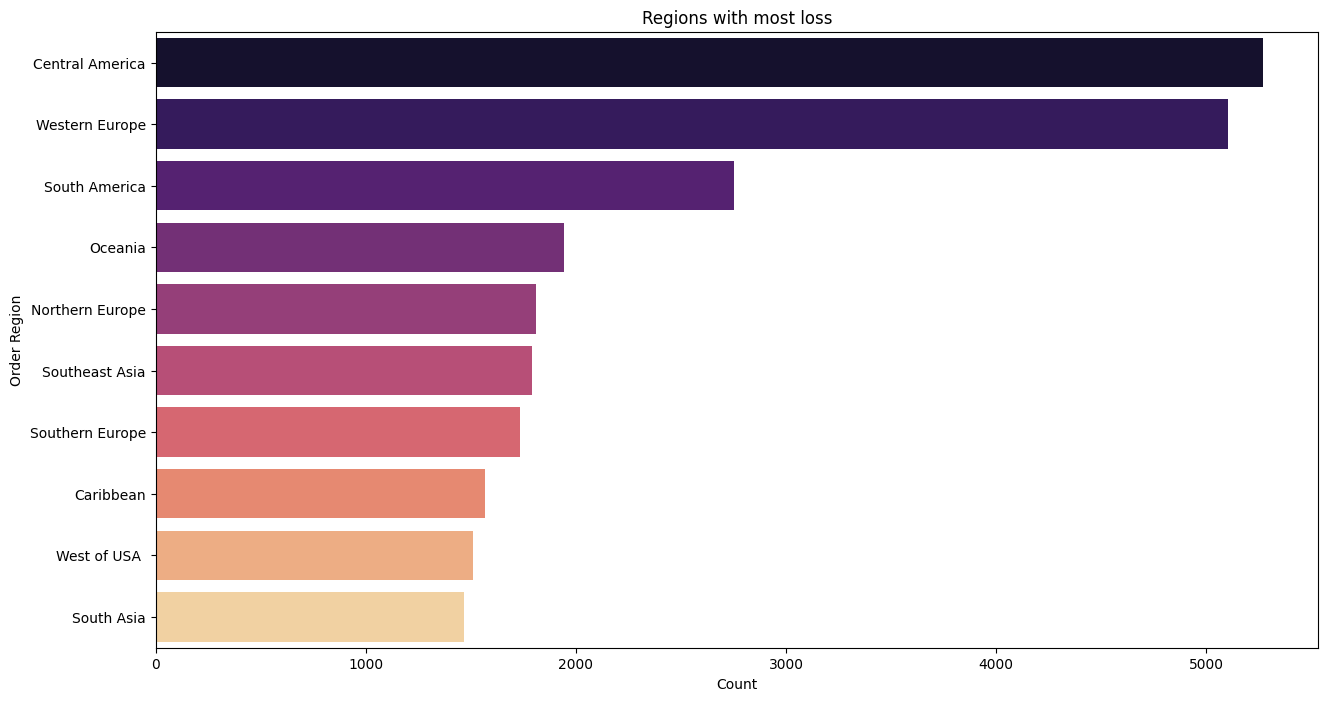


Total revenue lost with orders: -3883547.345768667


In [ ]:
# Plotting top 10 regions with most loss
plt.figure(figsize=(15, 8))
sns.barplot(x=loss['Order Region'].value_counts().nlargest(10), y=loss['Order Region'].value_counts().nlargest(10).index, palette='magma')
plt.title("Regions with most loss")
plt.xlabel("Count")
plt.ylabel("Order Region")
plt.show()

# Sum of total sales which are lost
print()
print('Total revenue lost with orders:', loss['Benefit per order'].sum())

#**Deriving Business Insights**


###Percentage of Late Delivery Risk for Each Shipping Mode

<Figure size 1200x800 with 0 Axes>

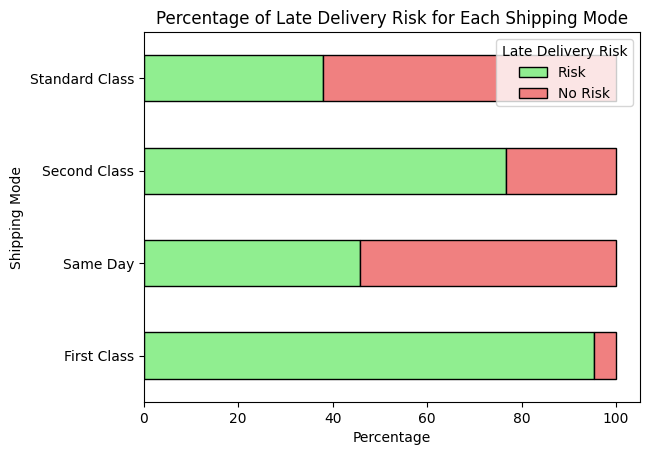

In [ ]:

# Creating a DataFrame with the percentage of late delivery risks for each shipping mode
df_risk_percentage = df.groupby(['Shipping Mode', 'Late_delivery_risk']).size().unstack()

# Calculating the percentage by dividing by the sum of each row and multiplying by 100
df_risk_percentage = df_risk_percentage.div(df_risk_percentage.sum(axis=1), axis=0) * 100

# Reordering columns to have 'Risk' first
df_risk_percentage = df_risk_percentage[[1, 0]]

# Plottin a horizontal stacked bar chart using seaborn
plt.figure(figsize=(12, 8))
df_risk_percentage.plot(kind='barh', stacked=True, color=['lightgreen', 'lightcoral'], edgecolor='black')

plt.title('Percentage of Late Delivery Risk for Each Shipping Mode')
plt.xlabel('Percentage')
plt.ylabel('Shipping Mode')
plt.legend(title='Late Delivery Risk', labels=['Risk', 'No Risk'])
plt.show()


###Proportion of Delivery Status by Shipping Mode

<Figure size 1200x800 with 0 Axes>

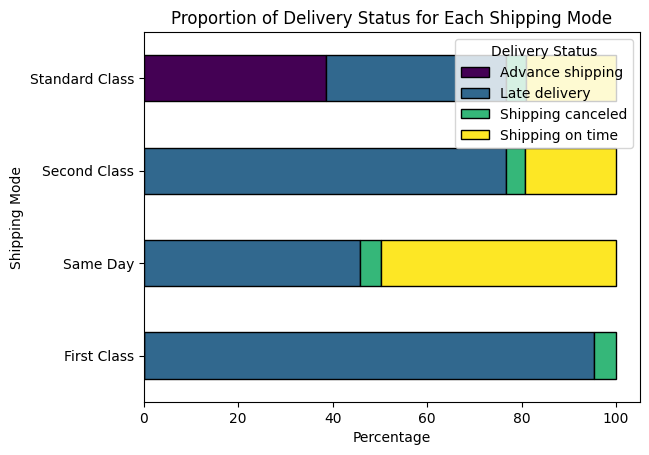

In [ ]:

# Creating a DataFrame with the percentage of each delivery status for each shipping mode
df_delivery_status_percentage = df.groupby(['Shipping Mode', 'Delivery Status']).size().unstack()
df_delivery_status_percentage = df_delivery_status_percentage.div(df_delivery_status_percentage.sum(axis=1), axis=0) * 100

# Plotting a horizontal stacked bar chart using seaborn
plt.figure(figsize=(12, 8))
df_delivery_status_percentage.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black')

plt.title('Proportion of Delivery Status for Each Shipping Mode')
plt.xlabel('Percentage')
plt.ylabel('Shipping Mode')
plt.legend(title='Delivery Status', loc='upper right')
plt.show()

###Percentage of Late Delivery Shipments by Shipping Method in Regions

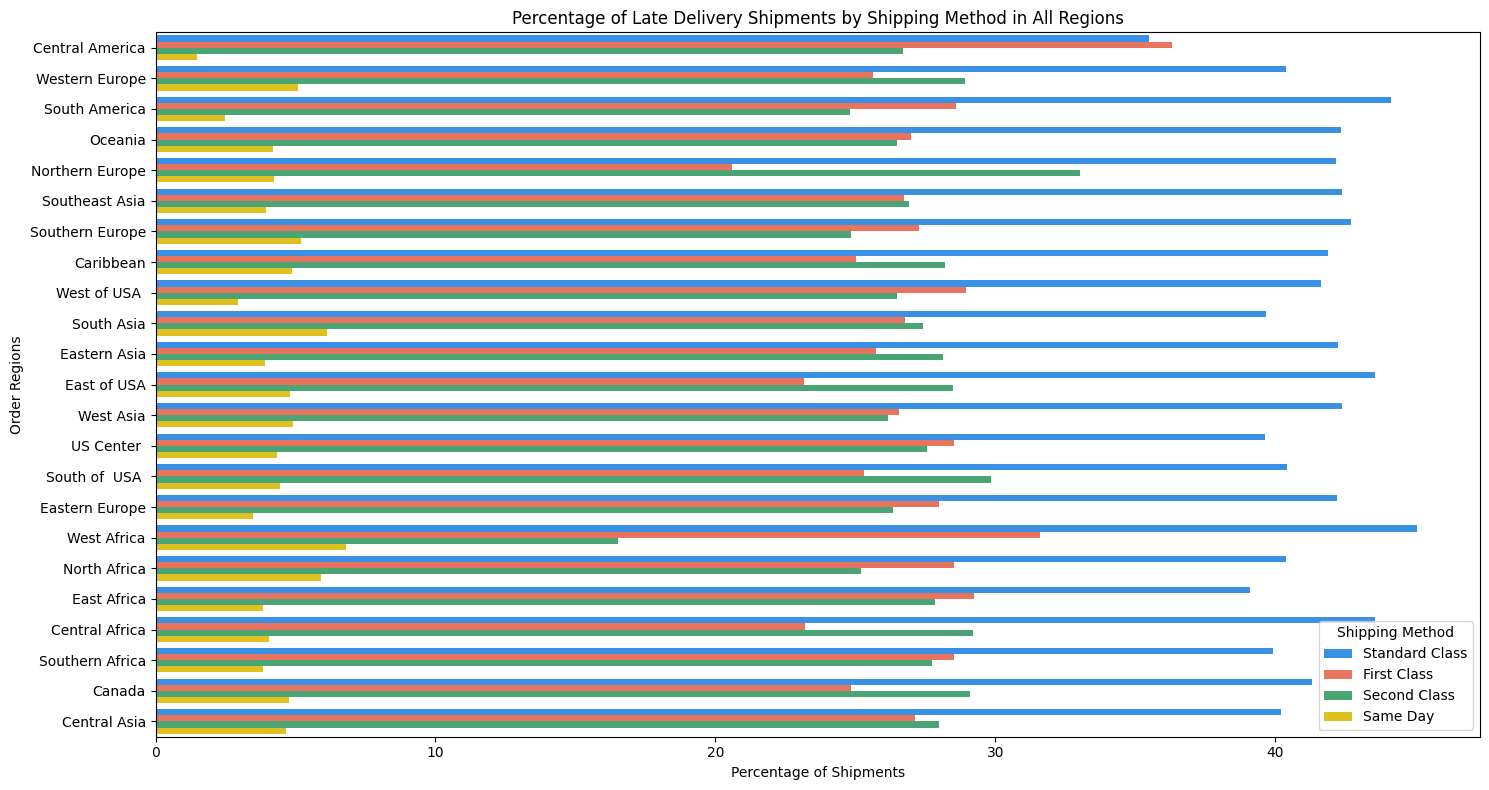

In [ ]:

# Filtering late delivery orders for each shipping mode
late_delivery_standard = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'Standard Class')]
late_delivery_first_class = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'First Class')]
late_delivery_second_class = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'Second Class')]
late_delivery_same_day = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'Same Day')]

# Counting total values for each shipping mode
count_standard = late_delivery_standard['Order Region'].value_counts()
count_first_class = late_delivery_first_class['Order Region'].value_counts()
count_second_class = late_delivery_second_class['Order Region'].value_counts()
count_same_day = late_delivery_same_day['Order Region'].value_counts()

# Indexing names
names = df['Order Region'].value_counts().keys()

# Creating a DataFrame for plotting
df_plot = pd.DataFrame({
    'Order Region': names,
    'Standard Class': count_standard,
    'First Class': count_first_class,
    'Second Class': count_second_class,
    'Same Day': count_same_day
})

# Calculating the percentage for each shipping mode
df_plot_percentage = df_plot.set_index('Order Region').div(df_plot.set_index('Order Region').sum(axis=1), axis=0) * 100

# Using seaborn to create horizontal stacked bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=df_plot_percentage.stack().reset_index(), y='Order Region', x=0, hue='level_1', palette=['dodgerblue', 'tomato', 'mediumseagreen', 'gold'])

plt.xlabel('Percentage of Shipments')
plt.ylabel('Order Regions')
plt.title('Percentage of Late Delivery Shipments by Shipping Method in All Regions')
plt.legend(title='Shipping Method')
plt.tight_layout()
plt.show()




###Highest Fraud Customers by Customer Id

<ipython-input-35-a6bb791940ca>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




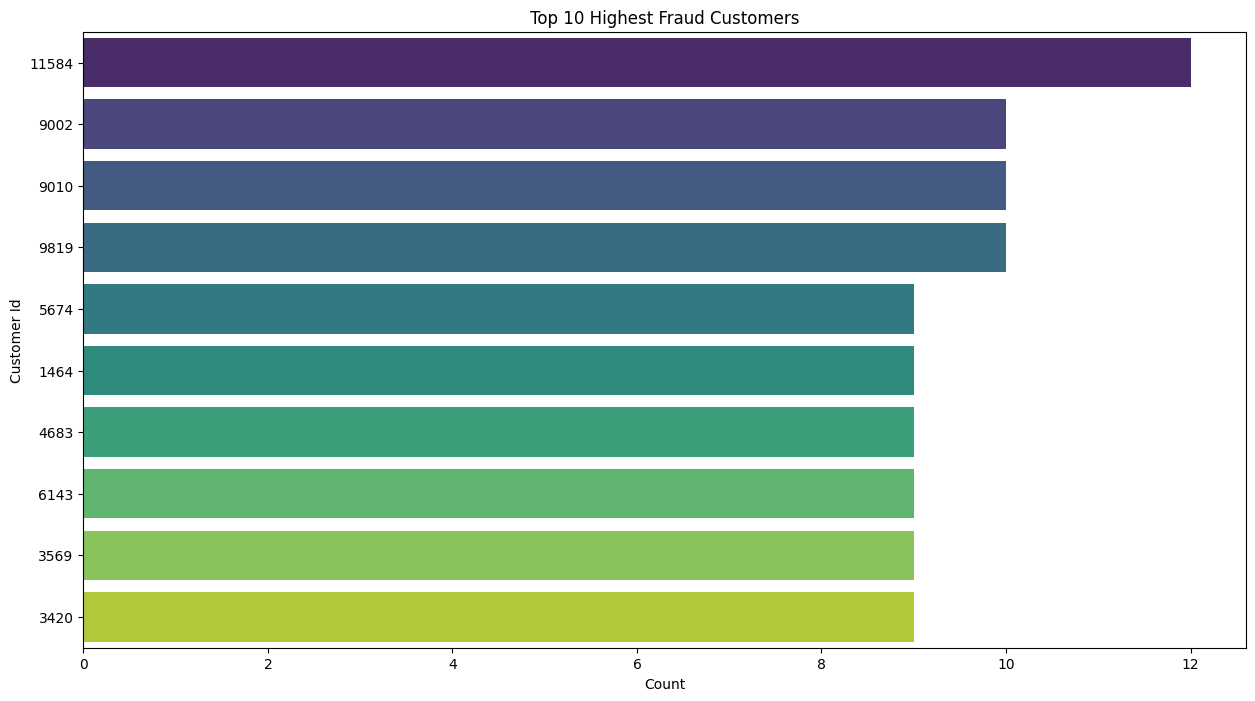

In [ ]:
# Filtering out suspected fraud orders in DataFrame df_full
fraud_orders = df[df['Order Status'] == 'SUSPECTED_FRAUD']

# Top 10 customers with most fraud based on Customer Id
plt.figure(figsize=(15, 8))
sns.countplot(y='Customer Id', data=fraud_orders, order=fraud_orders['Customer Id'].value_counts().nlargest(10).index, palette='viridis')
plt.title("Top 10 Highest Fraud Customers")
plt.xlabel("Count")
plt.ylabel("Customer Id")
plt.show()

###Highest Fraud Customers by Name

<ipython-input-36-7ec6c6121226>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




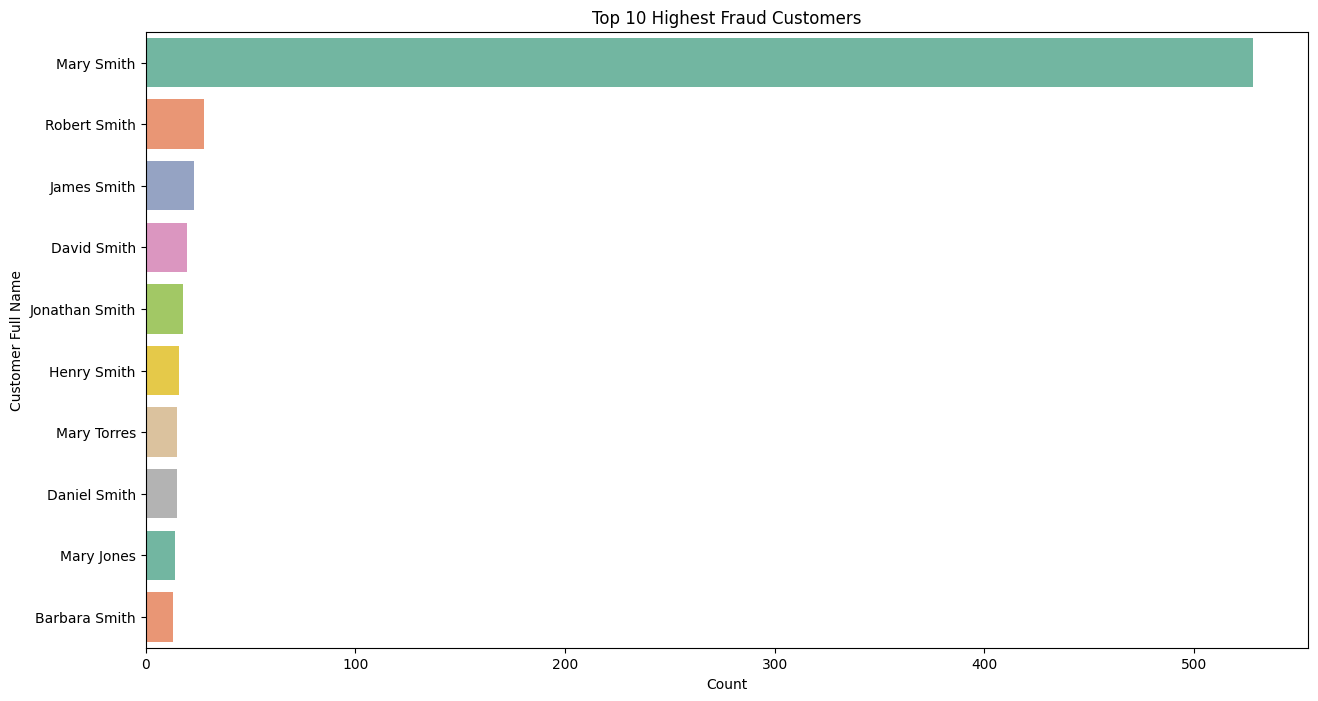

In [ ]:
# Combining 'Customer Fname' and 'Customer Lname' into a new column 'Customer Full Name'
df_full['Customer Full Name'] = df_full['Customer Fname'] + ' ' + df_full['Customer Lname']

# Filtering out suspected fraud orders in DataFrame df_full (our complete dataframe)
fraud_orders = df_full[df_full['Order Status'] == 'SUSPECTED_FRAUD']

# Top 10 customers with most fraud based on 'Customer Full Name'
top_fraud_customers = fraud_orders['Customer Full Name'].value_counts().nlargest(10)

# Plotting a horizontal bar chart using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x=top_fraud_customers.values, y=top_fraud_customers.index, palette=sns.color_palette("Set2", n_colors=10))
plt.title("Top 10 Highest Fraud Customers")
plt.xlabel("Count")
plt.ylabel("Customer Full Name")
plt.show()

###Basic Info of Mary Smith (Most Fraudulent Customer)

In [ ]:
mary_smith_data = df_full[df_full['Customer Full Name'] == 'Mary Smith']

# Extract relevant columns
mary_smith_info = mary_smith_data[['Order Id', 'Customer Id', 'Customer Street', 'Customer State']]

# Display the information
print("Information for Mary Smith:")
mary_smith_info.head()


Information for Mary Smith:


,Order Id,Customer Id,Customer Street,Customer State
49,45461,4741,9731 Honey Fox Towers,PR
52,47752,9114,1425 Fallen Fox Arbor,PR
55,36146,3296,8205 Silver Grove Row,PR
62,48434,9451,5723 Cinder Loop,PR
63,12827,542,2991 Silent Deer Landing,PR


###Losses associated with Mary Smith when Suspected Fraud

In [ ]:
# Calculating the total sales for Mary Smith with suspected fraud
mary_smith_losses = df_full[(df_full['Customer Full Name'] == 'Mary Smith') & (df_full['Order Status'] == 'SUSPECTED_FRAUD')]['Benefit per order'].sum()

print(f"Total losses associated with Mary Smith when order status is suspected fraud: ${mary_smith_losses:.2f}")



Total losses associated with Mary Smith when order status is suspected fraud: $8062.25


###Sales associated with Mary Smith when Suspected Fraud

In [ ]:
mary_smith_data = df_full[(df_full['Customer Full Name'] == 'Mary Smith') & (df_full['Order Status'] == 'SUSPECTED_FRAUD')]

# Calculating the total sales for Mary Smith with suspected fraud
total_sales_mary_smith = mary_smith_data['Sales'].sum()

print(f"Total sales associated with Mary Smith when order status is suspected fraud: ${total_sales_mary_smith:.2f}")


Total sales associated with Mary Smith when order status is suspected fraud: $102491.66
